In [1]:
!pip install vega

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('notebook')
from sklearn.cluster import KMeans

In [3]:
file_url = 'sum_activites_more_than_100.csv'

In [4]:
df = pd.read_csv(file_url, usecols=['resources', 'assignments', 'activities'])

In [5]:
df.head()

resources  assignments  activities
0        512        12474         574
1       2060         8423        1541
2        718         6061        3841
3       6843         2930         492
4        689         9421           5

In [6]:
df.tail()

resources  assignments  activities
144        102            0           9
145        111            0           0
146         37           50          22
147         71           21          11
148        102            0           0

In [7]:
df.describe()

resources   assignments   activities
count   149.000000    149.000000   149.000000
mean    469.530201    795.033557   135.516779
std     762.803493   1863.112183   482.652253
min       0.000000      0.000000     0.000000
25%      99.000000     11.000000     0.000000
50%     201.000000     83.000000     7.000000
75%     535.000000    521.000000    42.000000
max    6843.000000  12474.000000  3841.000000

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [10]:
kmeans = KMeans(random_state=42)

In [11]:
X = df[['assignments', 'activities']]

In [12]:
X_scaled = standard_scaler.fit_transform(X)
X_scaled

array([[ 6.28966741e+00,  9.11550888e-01],
       [ 4.10801523e+00,  2.92182099e+00],
       [ 2.83596821e+00,  7.70322867e+00],
       [ 1.14977887e+00,  7.41083310e-01],
       [ 4.64548471e+00, -2.71327794e-01],
       [ 3.47845428e+00,  5.45669257e-01],
       [ 1.82026936e+00,  7.02759497e+00],
       [ 2.58715969e+00,  8.20080480e-01],
       [ 3.41759851e+00, -1.56989785e-01],
       [ 1.37327570e+00,  3.02441127e-01],
       [ 7.03862306e-01,  3.07773645e+00],
       [ 1.73033208e+00, -1.38279929e-01],
       [ 2.30479863e-01, -2.48460192e-01],
       [ 1.36250477e+00,  1.81866499e-01],
       [ 1.63608643e+00, -3.15318977e-03],
       [ 2.68716670e-01,  2.37715629e+00],
       [ 5.18063736e-01,  3.06598873e-01],
       [ 5.06215711e-01,  1.47076770e+00],
       [ 3.94198023e-01,  1.80130849e+00],
       [-4.10929111e-01, -2.79643286e-01],
       [ 4.55592333e-01,  5.10328418e-01],
       [ 3.54884123e-01, -3.22574104e-02],
       [-2.19745076e-01, -2.65091176e-01],
       [ 5.

In [13]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [14]:
y_preds = kmeans.predict(X_scaled)
y_preds

array([6, 4, 1, 3, 2, 2, 1, 2, 2, 3, 5, 3, 7, 3, 3, 5, 7, 5, 5, 0, 7, 7,
       0, 7, 7, 0, 0, 7, 7, 7, 0, 0, 7, 0, 7, 7, 0, 7, 7, 0, 7, 7, 0, 0,
       0, 7, 7, 7, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [15]:
df['cluster'] = y_preds
df.head()

resources  assignments  activities  cluster
0        512        12474         574        6
1       2060         8423        1541        4
2        718         6061        3841        1
3       6843         2930         492        3
4        689         9421           5        2

In [16]:
df.pivot_table(values=['assignments', 'activities'], index='cluster', aggfunc=np.mean)

activities   assignments
cluster                           
0          15.036036    104.315315
1        3678.500000   5118.000000
2         248.250000   7353.750000
3         239.800000   3488.200000
4        1541.000000   8423.000000
5        1185.000000   1664.500000
6         574.000000  12474.000000
7         100.904762   1058.761905

In [17]:
chart = alt.Chart(df)

In [18]:
scatter_plot = chart.mark_circle()

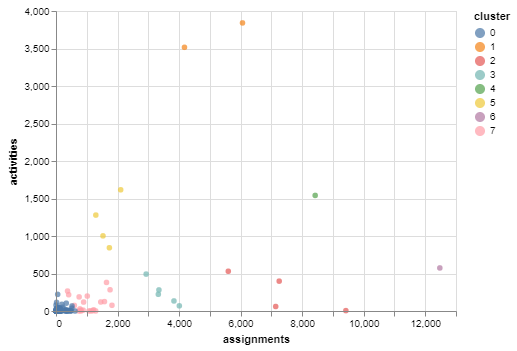

In [19]:
scatter_plot.encode(x='assignments', y='activities', color='cluster:N')

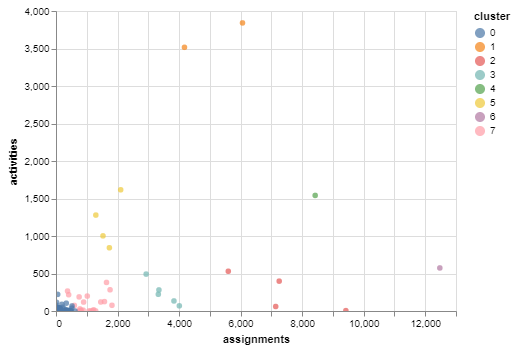

In [20]:
scatter_plot.encode(x='assignments', y='activities',color='cluster:N', tooltip=['resources', 'cluster', 'assignments', 'activities']).interactive()

In [21]:
kmeans.inertia_

9.207577403366768

In [22]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 10)
inertia = []

In [23]:
for k in clusters['cluster_range']:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
  inertia.append(kmeans.inertia_)

In [24]:
clusters['inertia'] = inertia
clusters

cluster_range       inertia
0              1  5.482128e+08
1              2  1.473533e+08
2              3  8.089730e+07
3              4  5.675947e+07
4              5  3.780894e+07
5              6  2.221620e+07
6              7  1.692715e+07
7              8  1.214145e+07
8              9  9.391067e+06

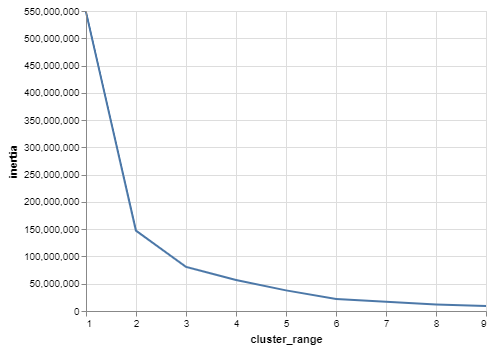

In [25]:
alt.Chart(clusters).mark_line().encode(x='cluster_range', y='inertia')

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
sse_ = []
sse_.append([0,0])
for k in range(2,20):
    if k>1:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        sse_.append([k-1,silhouette_score(X, kmeans.labels_)])

In [28]:
sse_

[[0, 0],
 [1, 0.869361755960116],
 [2, 0.8314500626319457],
 [3, 0.7637873165152103],
 [4, 0.7501359270674829],
 [5, 0.7486929707318865],
 [6, 0.7497373256835148],
 [7, 0.7459492841643217],
 [8, 0.6894816254801164],
 [9, 0.6830095825697542],
 [10, 0.6813001399770959],
 [11, 0.6801787559900128],
 [12, 0.675203852192018],
 [13, 0.6751358103882084],
 [14, 0.6746589170912418],
 [15, 0.6648150155003734],
 [16, 0.5368916031598062],
 [17, 0.5292647891373348],
 [18, 0.5095544191965754]]

In [29]:
type(sse_)

list

In [30]:
df2 = pd.DataFrame(sse_, columns=['cluster_range','silhouette_score'])

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
cluster_range       19 non-null int64
silhouette_score    19 non-null float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


In [32]:
df2.head()

cluster_range  silhouette_score
0              0          0.000000
1              1          0.869362
2              2          0.831450
3              3          0.763787
4              4          0.750136

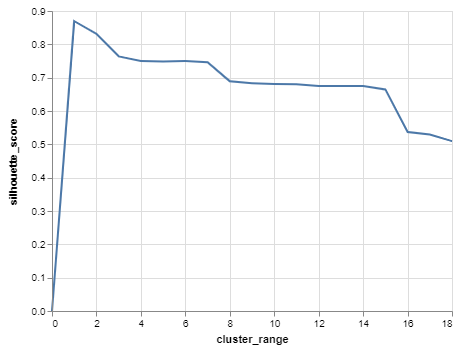

In [33]:
alt.Chart(df2).mark_line().encode(x='cluster_range', y='silhouette_score')

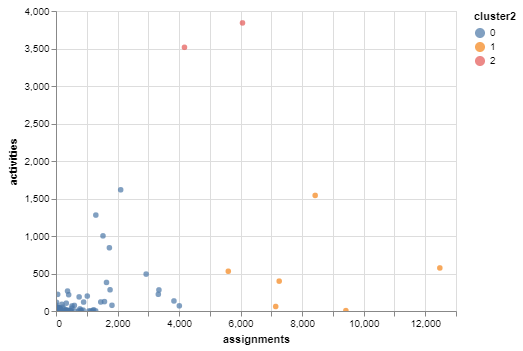

In [34]:
kmeans = KMeans(random_state=42, n_clusters=3)
kmeans.fit(X_scaled)
df['cluster2'] = kmeans.predict(X_scaled)
scatter_plot.encode(x='assignments', y='activities',color='cluster2:N',
    tooltip=['resources', 'cluster', 'assignments', 'activities']
).interactive()

In [35]:
kmeans = KMeans(random_state=42, n_clusters=3, init='random', n_init=1)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

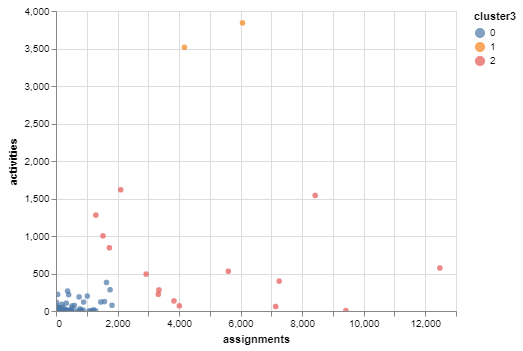

In [36]:
df['cluster3'] = kmeans.predict(X_scaled)
alt.Chart(df).mark_circle().encode(x='assignments', y='activities',color='cluster3:N',
    tooltip=['resources', 'cluster', 'assignments', 'activities']
).interactive()

In [37]:
kmeans = KMeans(random_state=42, n_clusters=3, init='k-means++', n_init=5)
kmeans.fit(X_scaled)
df['cluster4'] = kmeans.predict(X_scaled)
chart1 = alt.Chart(df).mark_circle().encode(x='assignments', y='activities',color='cluster4:N', 
    tooltip=['resources', 'cluster', 'assignments', 'activities'])
chart1

In [38]:
kmeans = KMeans(random_state=42, n_clusters=3, init='k-means++', n_init=5)
kmeans.fit(X)
df['cluster5'] = kmeans.predict(X)
chart1 = alt.Chart(df).mark_circle().encode(x='assignments', y='activities',color='cluster5:N', 
    tooltip=['resources', 'cluster', 'assignments', 'activities'])
chart1
centroids = kmeans.cluster_centers_

In [39]:
centroids = pd.DataFrame(centroids, columns=['assignments', 'activities'])
print(centroids)

   assignments  activities
0   201.314961   22.070866
1  8053.285714  992.714286
2  2434.666667  696.000000


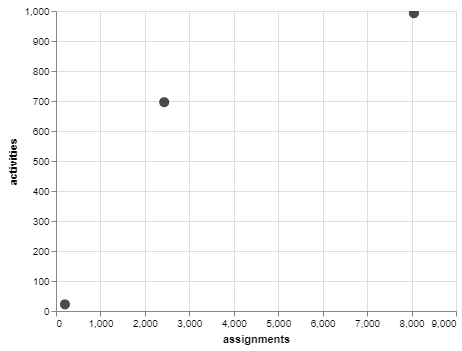

In [40]:
chart2 = alt.Chart(centroids).mark_circle(size=100).encode(x='assignments', y='activities', color=alt.value('black'),
    tooltip=['assignments', 'activities']).interactive()
chart2

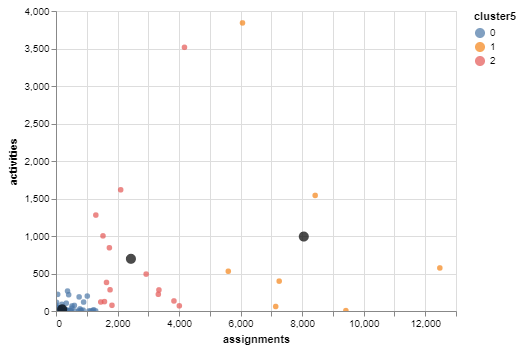

In [41]:
chart1 + chart2